In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!mkdir affectNetHQDB

In [6]:
import shutil
shutil.copy("/content/drive/MyDrive/AI_Datasets/affectnetHQ.zip", "/content/affectNetHQDB")

'/content/affectNetHQDB/affectnetHQ.zip'

In [28]:
shutil.copy("/content/drive/MyDrive/AI/Models/AlexNet_affectnet.pt", "/content/")

'/content/AlexNet_affectnet.pt'

In [14]:
cd /content/affectNetHQDB

/content/affectNetHQDB


In [15]:
import os

In [16]:
import zipfile
for file in os.listdir():
    print(file)
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, "r") as zip_file:
            zip_file.extractall()
        os.remove(file)
    

affectnetHQ.zip


In [17]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
import glob
import torch.optim as optim
import cv2
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import time
import torchvision.datasets as datasets
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import pandas as pd
%matplotlib inline

In [19]:
data_dir = '/content/affectNetHQDB'
IMAGE_DIM=256
print(os.listdir(data_dir))

['disgust', 'happy', 'fear', 'surprise', 'anger', 'sad', 'neutral']


In [20]:
def load_data(path, test_split, batch_size, input_size):
    
    ######## Write your code here ########
    
    transform_dict = {
                    'src': transforms.Compose([
                      transforms.Resize(input_size),
                      #transforms.RandomHorizontalFlip(), 
                      transforms.ToTensor(),
                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225]),
     ])}

    data = datasets.ImageFolder(root=path, transform=transform_dict['src'])

    dataset_size = len(data)

    train_size = int((1-test_split)*dataset_size)
    test_size = int(test_split * dataset_size)
  
    train_dataset, test_dataset = td.random_split(data, [train_size, test_size])

    data_loader_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    data_loader_test  = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    
    return data_loader_train, data_loader_test

(584, 584, 3)
(512, 512, 3)
(512, 512, 3)


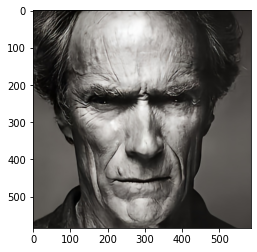

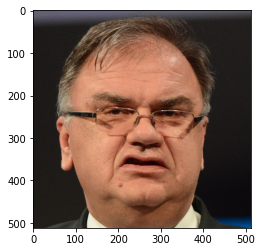

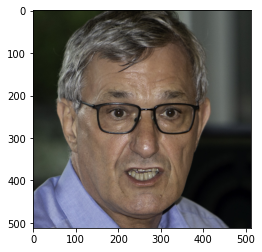

In [21]:
path = "/content/affectNetHQDB"

######## Write your code here ########
AngerImage = image.imread(path+"/anger/image0000007.jpg")
plt.figure()
plt.imshow(AngerImage)
DisgustImage = image.imread(path+"/disgust/ffhq_1.png")
plt.figure()
plt.imshow(DisgustImage)
NeutralImage = image.imread(path+"/neutral/ffhq_1002.png")
plt.figure()
plt.imshow(NeutralImage)
print(AngerImage.shape)
print(DisgustImage.shape)
print(NeutralImage.shape)

In [22]:
train_loader, test_loader = load_data(path, 0.1, 32, (224, 224))
print(len(train_loader), len(test_loader))

296 33


In [23]:
classes = ('anger', 'happy', 'disgust', 'neutral', 'surprise', 'sad', 'fear')

In [ ]:


# ##### Visualizing some random images ############
# import matplotlib.pyplot as plt
# import numpy as np

# #Function to show some random images
# def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
#     npimg = img.numpy()
#     plt.imshow(np.transpose(npimg, (1, 2, 0)))
#     plt.show()

# #Get some random training images
# dataiter = iter(train_loader)
# images, labels = dataiter.next()

# #Show images
# imshow(torchvision.utils.make_grid(images))
# # print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [26]:
def plot_data_loader(data_loader, gridDims):
    
    fig, axes = plt.subplots(nrows=gridDims[0], ncols=gridDims[1], figsize=(5,5))
    dataiter = iter(data_loader)
    for i in range(gridDims[0]):
        for j in range(gridDims[1]):
            images, _ = next(dataiter)
            axes[i, j].imshow(np.transpose(images[0].numpy(), (1, 2, 0)))

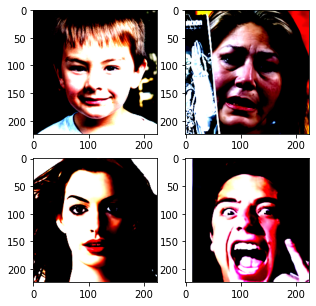

In [27]:
plot_data_loader(train_loader, (2, 2))

In [ ]:
!pip install torch==1.12.1
!pip install torchaudio==0.12.1
!pip install torchvision==0.13.1

     |█████████████▏                  | 319.7 MB 130.0 MB/s eta 0:00:04

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |██████████████████████████▉     | 652.1 MB 129.9 MB/s eta 0:00:01

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 776.4 MB 14 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.1
    Uninstalling torch-1.9.1:
      Successfully uninstalled torch-1.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 1.0.61 requires nvidia-ml-py3, which is not installed.
     |████████████████████████████████| 3.7 MB 25.5 MB/s eta 0:00:01
     |████████████████████████████████| 19.1 MB 5.4 MB/s eta 0:00:01
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.2.2
    Uninstalling torchvision-0.2.2:
      Successfully uninstalled torchvision-0.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 1.0.61 requires nvidia-ml-py3, which is not installed.


In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False)
n_classes = 3

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device);



Using cache found in /home/jovyan/.cache/torch/hub/pytorch_vision_v0.10.0
/srv/conda/envs/saturn/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/srv/conda/envs/saturn/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Device: cuda:0


In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device);

Device: cuda:0


In [ ]:
for i, data in enumerate(train_loader):
        images, labels = data[0].to(device), data[1].to(device)
        print(images.shape)
        #print(labels)
        if i == 5:
          break

torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


In [ ]:
def evaluate(model, test_loader):
  model.eval() 
  with torch.no_grad(): 
    correct = 0
    total = 0
    for data in test_loader:
      images, labels = data[0].to(device), data[1].to(device)
      labels=torch.flatten(labels)
      outputs = model(images)
      loss = criterion(outputs, labels)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  accuracy = (correct / total) * 100
  model.train()
  return accuracy, loss.item()

In [ ]:
num_epochs = 50
total_steps = len(train_loader)
t1 = time.time()

training_loss = []
training_accuracy = []
validation_loss = []
validation_accuracy = []


for epoch in range(num_epochs):
    for i, data in enumerate(train_loader):
        images, labels = data[0].to(device), data[1].to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        # Backprop and optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Train accuracy
        total = labels.size(0)
        _,predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        if (i + 1) % 50 == 0:
            val_accu , val_loss = evaluate(model, test_loader)
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%, val_accuracy: {:.2f}%'
            .format(epoch + 1, num_epochs, i + 1, total_steps, loss.item(),(correct / total) * 100, val_accu))
            training_loss.append(loss.item())
            training_accuracy.append((correct / total) * 100)

            validation_accuracy.append(val_accu)
            validation_loss.append(val_loss)
            
print("######## Training Finished in {} seconds ###########".format(time.time()-t1))


Epoch [1/50], Step [50/296], Loss: 6.7907, Accuracy: 15.62%, val_accuracy: 12.10%
Epoch [1/50], Step [100/296], Loss: 5.3888, Accuracy: 18.75%, val_accuracy: 16.10%
Epoch [1/50], Step [150/296], Loss: 2.0879, Accuracy: 6.25%, val_accuracy: 16.10%
Epoch [1/50], Step [200/296], Loss: 1.9955, Accuracy: 6.25%, val_accuracy: 13.33%
Epoch [1/50], Step [250/296], Loss: 1.9519, Accuracy: 21.88%, val_accuracy: 14.48%
Epoch [2/50], Step [50/296], Loss: 1.9241, Accuracy: 25.00%, val_accuracy: 16.76%
Epoch [2/50], Step [100/296], Loss: 2.0273, Accuracy: 3.12%, val_accuracy: 14.19%
Epoch [2/50], Step [150/296], Loss: 1.9943, Accuracy: 21.88%, val_accuracy: 16.29%
Epoch [2/50], Step [200/296], Loss: 1.9931, Accuracy: 12.50%, val_accuracy: 13.43%
Epoch [2/50], Step [250/296], Loss: 1.9977, Accuracy: 6.25%, val_accuracy: 14.57%
Epoch [3/50], Step [50/296], Loss: 1.9302, Accuracy: 15.62%, val_accuracy: 13.90%
Epoch [3/50], Step [100/296], Loss: 2.0095, Accuracy: 9.38%, val_accuracy: 14.48%
Epoch [3/50]

In [ ]:
torch.save(model.state_dict(), "/home/jovyan/dataset/AlexNet_affectnet.pt")

In [ ]:
model.eval() 
with torch.no_grad(): 
  correct = 0
  total = 0
  for data in test_loader:
    images, labels = data[0].to(device), data[1].to(device)
    labels=torch.flatten(labels)
    outputs = model(images)
    loss = criterion(outputs, labels)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print((correct / total) * 100)

57.904761904761905


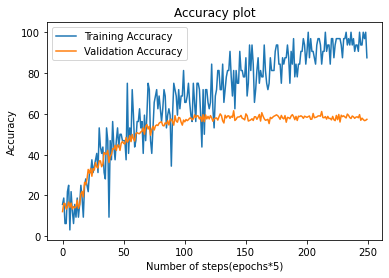

In [ ]:
epochs = [i for i in range(num_epochs*5)]
plt.figure(figsize=(18,12))
plt.xlabel('Number of steps(epochs*5)')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

plt.plot(epochs,training_accuracy,label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')    
plt.legend()
plt.savefig('Accuracy_AlexNet_Fer.png')

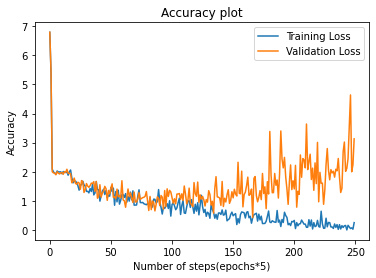

In [ ]:
epochs = [i for i in range(num_epochs*5)]
plt.figure(figsize=(18,12))
plt.xlabel('Number of steps(epochs*5)')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

plt.plot(epochs,training_loss,label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')    
plt.legend()
plt.savefig('Loss_AlexNet_Fer.png')

In [ ]:
!pip install seaborn

     |████████████████████████████████| 288 kB 23.2 MB/s eta 0:00:01


In [29]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet')

model.load_state_dict(torch.load('/content/AlexNet_affectnet.pt'))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device)

model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip


Device: cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

              precision    recall  f1-score   support

       anger       0.94      0.94      0.94       154
       happy       0.93      0.94      0.94       149
     disgust       0.93      0.92      0.92       151
     neutral       0.96      1.00      0.98       135
    surprise       0.99      0.97      0.98       171
         sad       0.96      0.94      0.95       142
        fear       0.94      0.94      0.94       148

    accuracy                           0.95      1050
   macro avg       0.95      0.95      0.95      1050
weighted avg       0.95      0.95      0.95      1050



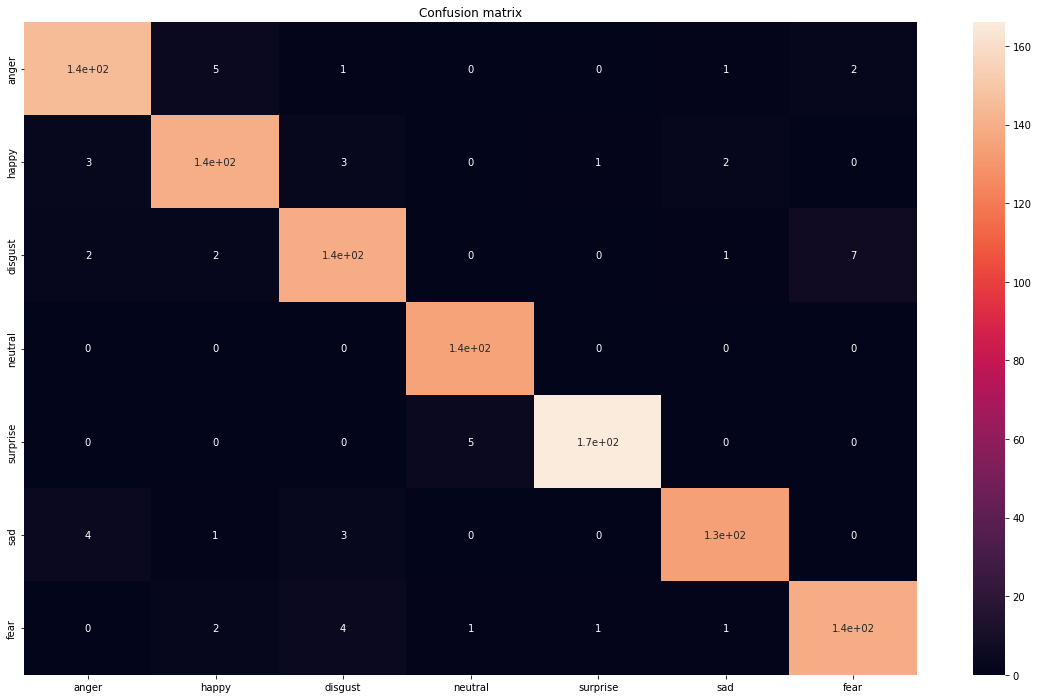

In [34]:
y_pred = []
y_true = []
for i, data in enumerate(test_loader):
    
    inputs, labels = data[0].to(device), data[1].to(device)
    output = model(inputs) # Feed Network
    
    output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
    y_pred.extend(output) # Save Prediction
    labels = labels.data.cpu().numpy()
    y_true.extend(labels) # Save Truth

# constant for classes
classes = ('anger', 'happy', 'disgust', 'neutral', 'surprise', 'sad', 'fear')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)

import seaborn as sns

# sns.heatmap(cf_matrix, annot=True)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                      columns = [i for i in classes])
plt.figure(figsize = (20,12))
sn.heatmap(df_cm, annot=True)
plt.title(f'Confusion matrix')
plt.savefig(f'Confusion_matrix_AlexNet_AffectNetHQ.png')
print(classification_report(y_true, y_pred, target_names=['anger', 'happy', 'disgust', 'neutral', 'surprise', 'sad', 'fear']))

# TSNE Plotting

In [36]:
face_map = {0:'anger', 1: 'happy', 2: 'disgust', 3: 'neutral', 4: 'surprise', 5: 'sad', 6: 'fear'}
model.eval()
targets_list = []
outputs_list = []

with torch.no_grad():
    for idx, (inputs, targets) in enumerate(train_loader):
        inputs = inputs.to(device)
        targets = targets.to(device)
        targets_np = targets.data.cpu().numpy()

        outputs = model(inputs)
        outputs_np = outputs.data.cpu().numpy()

        targets_list.append(targets_np[:, np.newaxis])
        outputs_list.append(outputs_np)

targets = np.concatenate(targets_list, axis=0)
outputs = np.concatenate(outputs_list, axis=0).astype(np.float64)

print(len(targets))
print(len(outputs))

9450
9450


generating t-SNE plot...


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[1]
 [4]
 [2]
 ...
 [4]
 [3]
 [4]]
              x          y   targets
0    -41.673428  -8.929594     happy
1     27.776049 -26.325048  surprise
2     20.177959  35.376743   disgust
3      0.690939 -13.214965      fear
4    -18.518003 -46.643597   neutral
...         ...        ...       ...
9445 -47.811615 -59.198505   neutral
9446  43.149475  11.724376      fear
9447  38.192284 -64.320244  surprise
9448 -11.559263 -55.001324   neutral
9449  26.703083 -51.340607  surprise

[9450 rows x 3 columns]
done!


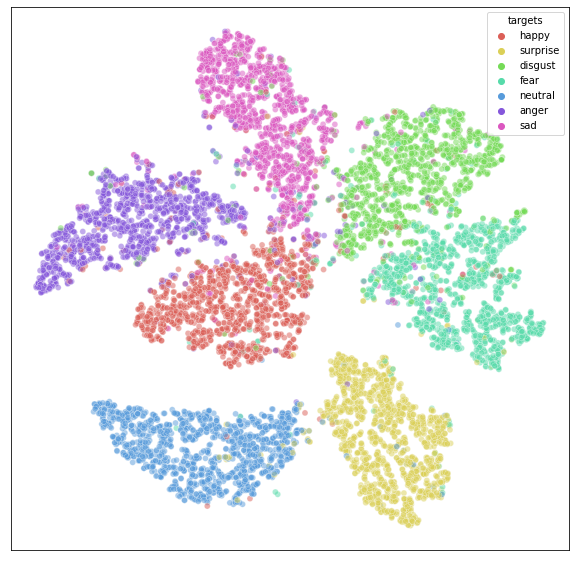

In [37]:
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
print('generating t-SNE plot...')
# tsne_output = bh_sne(outputs)
tsne = TSNE(random_state=0)
tsne_output = tsne.fit_transform(outputs)

df = pd.DataFrame(tsne_output, columns=['x', 'y'])
df.insert(2, 'targets', targets, True)
df.loc[:, 'targets'] = df.targets.map(face_map)

print(targets)
print(df)

plt.rcParams['figure.figsize'] = 10, 10
sns.scatterplot(
    x='x', y='y',
    hue='targets',
    palette=sns.color_palette("hls", 7),
    data=df,
    marker='o',
    legend="full",
    alpha=0.5
)

plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')

# plt.savefig(os.path.join(save_dir,'tsne.png'), bbox_inches='tight')
print('done!')
plt.savefig('TSNE_Alex_AffectNetHQ.png')